<h2>Figure 6 lower right</h2>

In [1]:
import scipy.io
import tensorflow as tf   # tested with tf 1.15.3
import numpy as np
import matplotlib.pyplot as plt
import os
from numpy import genfromtxt
from scipy import stats

import csv
import sys

In [2]:
alpha_range = [0.5, 0.8]; # alpha's in the output data files

iters = 60 # number of iid runs for each alpha
alpha_pos = 1 #   0 --> a=0.5, 1 --> a=0.8


In [3]:
x1 = np.zeros(shape=(iters,1))

#load Healthy-Healthy data
for i in range(1, iters):
    
    P = genfromtxt('./all_Healthy_vs_Healthy_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16/N_39000/Lip1_arch_16_16_16_8_1_lr_0.01_alpha_0.5_0.8_sick_first/H3_H4_H5_H6_H7_HALF_SAMPLES_vs_Healthy_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16lambda_1.0_gp_0.1_bs_4000_nerd_iter' + str(i) + '.csv', delimiter=',', dtype='float32')
    x1[i] = P[alpha_pos]
    

In [4]:
x2 = np.zeros(shape=(iters,1))

#load Healthy-CBF at 0.2% spike-in data
for i in range(1, iters):
    
    P = genfromtxt('./all_Healthy_vs_CBF_0.2perc_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16/N_39000/Lip1_arch_16_16_16_8_1_lr_0.01_alpha_0.5_0.8_sick_first/H3_H4_H5_H6_H7_HALF_SAMPLES_vs_CBF_perc6_markers_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16lambda_1.0_gp_0.1_bs_4000_nerd_iter' + str(i) + '.csv', delimiter=',', dtype='float32')
    x2[i] = P[alpha_pos]
    

In [5]:
x1.shape
#x2.shape

(60, 1)

(0.0, 0.3)

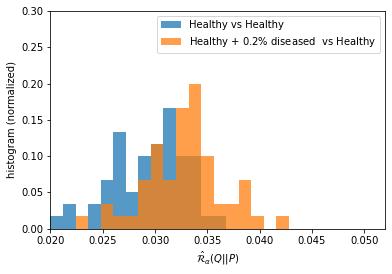

In [13]:
edges = np.arange(0.02, 0.052, 0.0012)
plt.hist(x1, edges, weights=np.ones(len(x1)) / len(x1), density=False, alpha=0.75, label='Healthy vs Healthy')

edges2 = np.arange(0.02, 0.052, 0.0012)
plt.hist(x2, edges2, weights=np.ones(len(x2)) / len(x2), density=False, alpha=0.75, label='Healthy + $0.2\%$ diseased  vs Healthy')

#plt.legend({'Healthy vs Healthy', 'Healthy + $0.5\%$ diseased  vs Healthy'}, loc='upper right') 
plt.legend(loc='upper right') 
plt.xlabel(r'$\hat{\mathcal{R}}_{\alpha}(Q ||P)$')
plt.ylabel('histogram (normalized)')

plt.xlim(0.02, 0.052)
plt.ylim(0, 0.3)


In [8]:
# KS test
stats.ks_2samp(x1[:,0], x2[:,0])

Ks_2sampResult(statistic=0.4166666666666667, pvalue=4.757120453405423e-05)